In [1]:
spark.version

'3.0.1'

In [2]:
import subprocess

from pyspark.sql.functions import *
from pyspark.sql.types import *

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [3]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [4]:
directory = 'gs://msca-bdp-tweets/final_project/'
# file = '*.json'
# path = directory + file
path = directory

In [5]:
cmd = 'hadoop fs -du -s -h ' + directory

p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, universal_newlines=True)
for line in p.stdout.readlines():
    print (line)
    
retval = p.wait()

156.2 G  156.2 G  gs://msca-bdp-tweets/final_project



In [6]:
%%time

tweets_df = spark.read.json(path)

CPU times: user 23.2 ms, sys: 16.8 ms, total: 40 ms
Wall time: 3min 24s


In [7]:
country = tweets_df.select([tweets_df.created_at,
                         tweets_df.place.country.alias("country"),
                         tweets_df.id,
                        tweets_df.text])

In [8]:
import pandas as pd

import pyspark.sql.functions as f

In [9]:
data = country\
    .withColumn("text",f.lower(f.col("text")))

In [10]:
covid_data = data.filter((data.text.contains("covid"))\
                          | (data.text.contains("coronavirus"))\
                          | (data.text.contains("pandemic"))\
                          | (data.text.contains("vaccin"))\
                          | (data.text.contains("booster"))\
                          | (data.text.contains("pfizer"))\
                          | (data.text.contains("moderna"))\
                          | (data.text.contains("j&j"))\
                          | (data.text.contains("johnson and johnson")))

In [11]:
country.printSchema()

root
 |-- created_at: string (nullable = true)
 |-- country: string (nullable = true)
 |-- id: long (nullable = true)
 |-- text: string (nullable = true)



In [12]:
time = country.select(['id','created_at'])

In [13]:
from pyspark.sql.functions import split

In [14]:
time1 = time.withColumn('weekday', split(time['created_at'], ' ').getItem(0)) \
            .withColumn('month', split(time['created_at'], ' ').getItem(1)) \
            .withColumn('day', split(time['created_at'], ' ').getItem(2)) \
            .withColumn('time', split(time['created_at'], ' ').getItem(3)) \
            .withColumn('0000', split(time['created_at'], ' ').getItem(4)) \
            .withColumn('year', split(time['created_at'], ' ').getItem(5))

In [15]:
#time1

In [16]:
time2 = time1.withColumn("month_number",from_unixtime(unix_timestamp(col("month"),'MMM'),'MM'))

In [18]:
#time2

In [19]:
time3 = time2.withColumn("merge", concat_ws("-", "month_number", "day", "year")) \
  .withColumn("date", to_date(unix_timestamp("merge", "MM-dd-yyyy").cast("timestamp"))).drop("merge")

In [20]:
#time3

In [21]:
time4 = time3.drop("created_at")\
        .drop("weekday")\
        .drop("month")\
        .drop("day")\
        .drop("time")\
        .drop("0000")\
        .drop("year")\
        .drop("month_number")

In [23]:
#time4

In [ ]:
joined_df = influence_score.join(total_counts, "user_id" ,"left")

In [24]:
month = time1.select(['id','created_at','month'])

In [25]:
month2 = country.join(month, 
                       "id",
                       "left")

In [18]:
#month2

In [19]:
month3 = month2.na.drop(subset = ['country'])

In [21]:
#month3

In [26]:
#month3.count() #139596

In [22]:
countries = month3.select(['month', 'country']).groupby('month','country').count()

In [24]:
#countries

In [25]:
october = countries.filter(countries.month == 'Oct')

In [26]:
#october

In [27]:
october2 = october.orderBy('count', ascending = False)

In [29]:
#october2

In [30]:
top5countries = october2.limit(5)

In [31]:
top5countries

month,country,count
Oct,United States,39804
Oct,United Kingdom,17070
Oct,Canada,5440
Oct,India,3961
Oct,Australia,3745


In [32]:
df_pandas = top5countries.toPandas()

NameError: name 'plt' is not defined

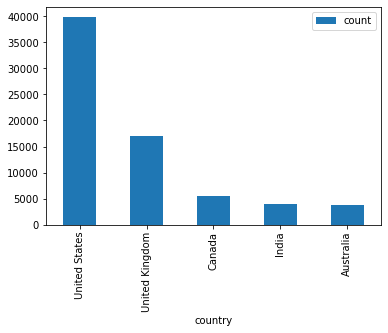

In [33]:
df_pandas.plot(kind='bar', x='country', y='count')
plt.show()

In [34]:
november = countries.filter(countries.month == 'Nov')

In [35]:
november2 = november.orderBy('count', ascending = False)

In [37]:
#november2

In [38]:
top5countries2 = november2.limit(5)

In [39]:
top5countries2

month,country,count
Nov,United States,30855
Nov,United Kingdom,9004
Nov,Canada,3533
Nov,Australia,1932
Nov,India,1803


In [40]:
df_pandas2 = top5countries2.toPandas()

NameError: name 'plt' is not defined

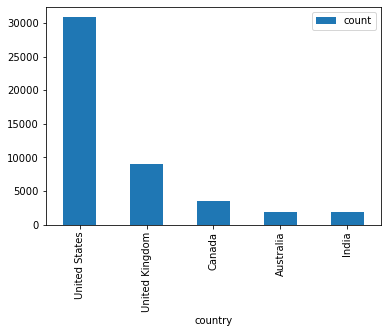

In [41]:
df_pandas2.plot(kind='bar', x='country', y='count')
plt.show()